# Breast cancer Wisconsin data example
[link](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788295758/5/ch05lvl1sec41/knn-classifier-with-breast-cancer-wisconsin-data-example
)


Breast cancer data has been utilized from the UCI machine learning repository http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29 for illustration purposes. Here the task is to find whether the cancer is malignant or benign based on various collected features such as clump thickness and so on using the KNN classifier:

In [1]:
import numpy as np 
import pandas as pd 
import csv
from sklearn.metrics import accuracy_score,classification_report 

breast_cancer = pd.read_csv("knn-naive_bayes-breast_cancer/breast-cancer-wisconsin.csv") 
breast_cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [2]:
breast_cancer.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


The following are the first few rows to show how the data looks like. 

- The Class value has class `2` and `4`. Value `2` and `4` represent benign and malignant class, respectively. - - - Whereas all the other variables do vary between value `1` and `10`, which are very much categorical in nature:

In [3]:
for column_name in breast_cancer.columns:
    print(f'{column_name} - {set(breast_cancer[column_name])}')

Clump Thickness - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Uniformity of Cell Size - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Uniformity of Cell Shape - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Marginal Adhesion - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Single Epithelial Cell Size - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Bare Nuclei - {'?', '4', '9', '2', '8', '1', '7', '5', '3', '6', '10'}
 Bland Chromatin - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Normal Nucleoli - {1, 2, 3, 4, 5, 6, 7, 8, 9, 10}
 Mitoses - {1, 2, 3, 4, 5, 6, 7, 8, 10}
 Class - {2, 4}


Only the Bare_Nuclei variable has some missing values, here we are replacing them with the most frequent value (category value 1) in the following code:

In [4]:
breast_cancer[' Bare Nuclei'] = breast_cancer[' Bare Nuclei'].replace('?', np.NAN) 
breast_cancer[' Bare Nuclei'] = \
    breast_cancer[' Bare Nuclei'].fillna(breast_cancer[' Bare Nuclei'].value_counts().index[0])

breast_cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Use the following code to convert the classes to a 0 and 1 indicator for using in the classifier

In [5]:
breast_cancer['Cancer Ind'] = 0 
breast_cancer.loc[breast_cancer[' Class']==4, 'Cancer Ind'] = 1

breast_cancer.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,Cancer Ind
1000025,5,1,1,1,2,1,3,1,1,2,0
1002945,5,4,4,5,7,10,3,2,1,2,0
1015425,3,1,1,1,2,2,3,1,1,2,0
1016277,6,8,8,1,3,4,3,7,1,2,0
1017023,4,1,1,3,2,1,3,1,1,2,0


In the following code, we are dropping non-value added variables from analysis:

In [6]:
x_vars = breast_cancer.drop([' Class','Cancer Ind'],axis=1) 
y_var = breast_cancer['Cancer Ind']

As KNN is very sensitive to distances, here we are standardizing all the columns before applying algorithms:

In [7]:
from sklearn.preprocessing import StandardScaler 
x_vars_stdscle = StandardScaler().fit_transform(x_vars.values) 

x_vars_stdscle_df = pd.DataFrame(x_vars_stdscle, index=x_vars.index, columns=x_vars.columns) 
x_vars_stdscle_df.head()

/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/alicia/workspace/intro_ml_python/venv/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses
1000025,0.206936,-0.699995,-0.743299,-0.633247,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912
1002945,0.206936,0.283845,0.266875,0.768621,1.710106,1.799664,-0.179662,-0.284112,-0.343912
1015425,-0.503866,-0.699995,-0.743299,-0.633247,-0.549561,-0.410685,-0.179662,-0.611825,-0.343912
1016277,0.562336,1.595632,1.613773,-0.633247,-0.097628,0.141902,-0.179662,1.354454,-0.343912
1017023,-0.148465,-0.699995,-0.743299,0.067687,-0.549561,-0.686979,-0.179662,-0.611825,-0.343912


In [8]:
from sklearn.model_selection import train_test_split 

x_train,x_test,y_train,y_test = train_test_split(x_vars_stdscle_df,y_var, test_size = 0.3, random_state=42)

## KNN classifier

KNN classifier is being applied with neighbor value of 3 and p value indicates it is 2-norm, also known as Euclidean distance for computing classes:

In [9]:
from sklearn.neighbors import KNeighborsClassifier 
knn_fit = KNeighborsClassifier(n_neighbors=3,p=2,metric='minkowski') 
knn_fit.fit(x_train,y_train) 
 
print ("\nK-Nearest Neighbors - Train Confusion Matrix\n\n",pd.crosstab(y_train, knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )      
print ("\nK-Nearest Neighbors - Train accuracy:",round(accuracy_score(y_train, knn_fit.predict(x_train)),3)) 
print ("\nK-Nearest Neighbors - Train Classification Report\n", classification_report( y_train,knn_fit.predict(x_train))) 
 
print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab(y_test, knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))       
print ("\nK-Nearest Neighbors - Test accuracy:",round(accuracy_score( y_test,knn_fit.predict(x_test)),3)) 
print ("\nK-Nearest Neighbors - Test Classification Report\n", classification_report(y_test,knn_fit.predict(x_test)))


K-Nearest Neighbors - Train Confusion Matrix

 Predicted    0    1
Actuall            
0          309    6
1            4  170

K-Nearest Neighbors - Train accuracy: 0.98

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       0.99      0.98      0.98       315
           1       0.97      0.98      0.97       174

   micro avg       0.98      0.98      0.98       489
   macro avg       0.98      0.98      0.98       489
weighted avg       0.98      0.98      0.98       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          141   2
1            3  64

K-Nearest Neighbors - Test accuracy: 0.976

K-Nearest Neighbors - Test Classification Report
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       143
           1       0.97      0.96      0.96        67

   micro avg       0.98      0.98      0.98       210
   macro avg

From the results, it is appearing that KNN is working very well in classifying malignant and benign classes well, obtaining test accuracy of 97.6 percent with 96 percent of recall on malignant class. The only deficiency of KNN classifier would be, it is computationally intensive during test phase, as each test observation will be compared with all the available observations in train data, which practically KNN does not learn a thing from training data. Hence, we are also calling it a lazy classifier!

### Tuning of k-value in KNN classifier

In the previous section, we just checked with only the k-value of three. Actually, in any machine learning algorithm, we need to tune the knobs to check where the better performance can be obtained. In the case of KNN, the only tuning parameter is k-value. Hence, in the following code, we are determining the best k-value with grid search:

In [10]:
# Tuning of K- value for Train & Test data 
dummyarray = np.empty((5,3)) 
k_valchart = pd.DataFrame(dummyarray) 
k_valchart.columns = ["K_value","Train_acc","Test_acc"] 
 
k_vals = [1,2,3,4,5] 

for i in range(len(k_vals)): 
    knn_fit = KNeighborsClassifier(n_neighbors=k_vals[i],p=2,metric='minkowski') 
    knn_fit.fit(x_train,y_train) 
 
    print ("\nK-value",k_vals[i]) 
     
    tr_accscore = round(accuracy_score(y_train,knn_fit.predict(x_train)),3) 
    print ("\nK-Nearest Neighbors - Train ConfusionMatrix\n\n",pd.crosstab( y_train, knn_fit.predict(x_train),rownames = ["Actuall"],colnames = ["Predicted"]) )      
    print ("\nK-Nearest Neighbors - Train accuracy:",tr_accscore) 
    print ("\nK-Nearest Neighbors - Train Classification Report\n", classification_report(y_train,knn_fit.predict(x_train))) 
 
    ts_accscore = round(accuracy_score(y_test,knn_fit.predict(x_test)),3)     
    print ("\n\nK-Nearest Neighbors - Test Confusion Matrix\n\n",pd.crosstab( y_test,knn_fit.predict(x_test),rownames = ["Actuall"],colnames = ["Predicted"]))       
    print ("\nK-Nearest Neighbors - Test accuracy:",ts_accscore) 
    print ("\nK-Nearest Neighbors - Test Classification Report\n",classification_report(y_test,knn_fit.predict(x_test))) 
     
    k_valchart.loc[i, 'K_value'] = k_vals[i]       
    k_valchart.loc[i, 'Train_acc'] = tr_accscore      
    k_valchart.loc[i, 'Test_acc'] = ts_accscore                


K-value 1

K-Nearest Neighbors - Train ConfusionMatrix

 Predicted    0    1
Actuall            
0          315    0
1            0  174

K-Nearest Neighbors - Train accuracy: 1.0

K-Nearest Neighbors - Train Classification Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       315
           1       1.00      1.00      1.00       174

   micro avg       1.00      1.00      1.00       489
   macro avg       1.00      1.00      1.00       489
weighted avg       1.00      1.00      1.00       489



K-Nearest Neighbors - Test Confusion Matrix

 Predicted    0   1
Actuall           
0          141   2
1            7  60

K-Nearest Neighbors - Test accuracy: 0.957

K-Nearest Neighbors - Test Classification Report
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       143
           1       0.97      0.90      0.93        67

   micro avg       0.96      0.96      0.96       210
   

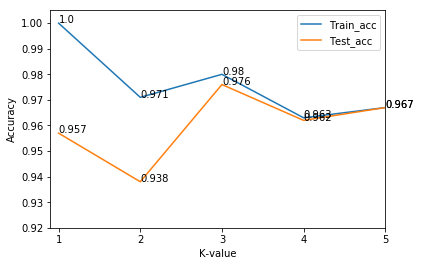

In [12]:
# Ploting accuracies over varied K-values 
import matplotlib.pyplot as plt

plt.figure() 
plt.xlabel('K-value') 
plt.ylabel('Accuracy') 
plt.plot(k_valchart["K_value"],k_valchart["Train_acc"]) 
plt.plot(k_valchart["K_value"],k_valchart["Test_acc"]) 
 
plt.axis([0.9,5, 0.92, 1.005]) 
plt.xticks([1,2,3,4,5]) 
 
for a,b in zip(k_valchart["K_value"],k_valchart["Train_acc"]): 
     plt.text(a, b, str(b),fontsize=10) 
 
for a,b in zip(k_valchart["K_value"],k_valchart["Test_acc"]): 
    plt.text(a, b, str(b),fontsize=10) 
     
plt.legend(loc='upper right')     
plt.show()

It appears that with less value of k-value, it has more overfitting problems due to the very high value of accuracy on train data and less on test data, with the increase in k-value more the train and test accuracies are converging and becoming more robust. This phenomenon illustrates the typical machine learning phenomenon. As for further analysis, readers are encouraged to try k-values higher than five and see how train and test accuracies are changing. 